In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

RNAi

In [63]:
para = {}

para.update({'gene': 100, 'gVEGF': 100, 'gPri': 100})  # gene copies

# prishRNA 的 alpha 在后面确定，不同细胞不同
para.update({'alpha_VEGF': 1.5e-3}) # alpha: transcription rate

# para.update({'beta_VEGF': 0.42}) # beta: translation rate
para.update({'beta_VEGF': 0.000162}) # beta: translation rate

# 好几个米氏常数是估计的
para.update({'k_m,dicer': 1.2e3, 'v_max,dicer': 0.246, 'k_m,Drosha': 1.2e3, 'v_max,Drosha': 0.246}) # M parameters

para.update({'d_mRNA,VEGF':3.3e-3, 'd_p,VEGF': 5.22e-3, 'd_RNA': 8.887e-4, 'd_RIM': 3.3e-3 })

# v_as and v_dis in our hypothesis
para.update({'v_as,RISC/miRNA': 1e-3, 'v_dis,RISC/miRNA': 1e-3, 'v_as,RIM': 1e-3, 'v_dis,RIM': 1e-3})

# transport parameter
para.update({'v_trans': 2e-3})


In [46]:
def RNAi(x, t):
    #     prishRNA, preshRNAi, preshRNAo, dssiRNA, mVEGF, pVEGF = x # 解耦
    prishRNA, preshRNAi, preshRNAo, dssiRNA, mVEGF, Rmi, RIM = x # 解耦
    
    RISC = 100 - Rmi - RIM
    # n = x.shape[0] # 6
    dx = np.zeros( 7 )
    # 接下来对照着latex公式和参数表输入
    # prishRNA
    dx[0] = para['alpha_prishRNA'] * para['gPri'] - (para['v_max,Drosha'] * prishRNA) / (para['k_m,Drosha'] + prishRNA) - para['d_RNA'] * prishRNA

    # preshRNA inside
    dx[1] = (para['v_max,Drosha'] * prishRNA) / (para['k_m,Drosha'] + prishRNA) - para['v_trans'] * preshRNAi - para['d_RNA'] * preshRNAi

    #preshRNA outside
    dx[2] = para['v_trans'] * preshRNAi - (para['v_max,dicer'] * preshRNAo) / (preshRNAo + para['k_m,dicer']) - para['d_RNA'] * preshRNAo

    #dssiRNA
    dx[3] = (para['v_max,dicer'] * preshRNAo) / (preshRNAo + para['k_m,dicer']) - para['d_RNA'] * dssiRNA   \
            - para['v_as,RISC/miRNA'] * RISC * dssiRNA + para['v_dis,RISC/miRNA'] * Rmi

    # mRNA
    dx[4] = para['gVEGF'] * para['alpha_VEGF'] - para['d_RNA'] * mVEGF - para['v_as,RIM'] * Rmi * mVEGF + para['v_dis,RIM'] * RIM 
    
    # RISC/miRNA  Rmi
    dx[5] = + para['v_as,RISC/miRNA'] * RISC * dssiRNA - para['v_dis,RISC/miRNA'] * Rmi - para['v_as,RIM'] * Rmi * mVEGF + para['v_dis,RIM'] * RIM 

    # RISC/miRNA/mRNA
    dx[6] = para['v_as,RIM'] * Rmi * mVEGF - para['v_dis,RIM'] * RIM - para['d_RIM'] * RIM

    #     # VEGF protein
    #     dx[5] = para['beta_VEGF'] * mVEGF - para['d_p,VEGF'] * pVEGF

    return dx



In [47]:
# 模拟5000个单位
def run(para):
    t = np.linspace(1,10000,2000)
    ini = np.ones(7) * 1e-8  # ODE initial value

    para.update({'alpha_prishRNA': 1.5e-1})  # 1.5e-1
    x_can = odeint(RNAi,ini,t)

    para.update({'alpha_prishRNA': 1.5e-3})  # 1.5e-3
    x_ord = odeint(RNAi,ini,t)
    return x_can, x_ord

In [48]:
# 绘图
def draw(x_can, x_ord, name):
    titles = ['prish-RNA', 'preshRNA inside', 'preshRNA outside', 'dssi-RNA', 'VEGF mRNA', 'RISC&siRNA', 'RISC&siRNA&mRNA']  # 各个子图的title
    fig = plt.figure(figsize=(20,10))
    for i in range(2):
        for j in range(4):
            count = 4*i + j
            if count > 6:
                break
            plt.subplot(2,4,count+1)
            plt.plot(t, x_can[:,count], color='red', linewidth=2)
            plt.plot(t, x_ord[:,count], color='green', linewidth=2)
            plt.title(titles[count], fontsize=20)
    # fig.suptitle(r'Results ',fontsize=16,x=0.53,y=1.05,)
    # plt.title(r'Results when TGF-$\beta$ is low(red) or high(green)')
    fig.tight_layout() 
    fig.savefig('./' + name + '.png', bbox_inches = 'tight')
    fig.show()

<ipython-input-48-8ade4e01c0bc>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


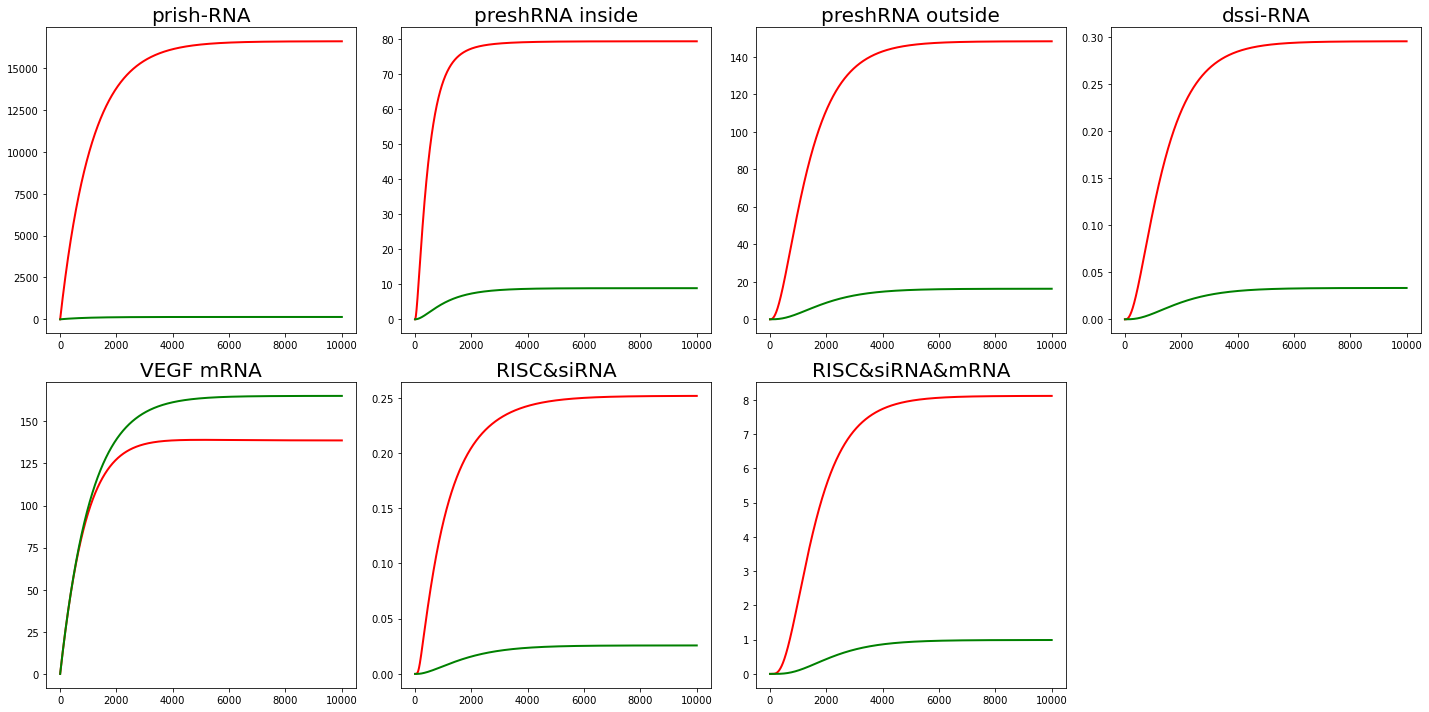

In [49]:
# ini
x_can, x_ord = run(para)
draw(x_can, x_ord, name='model_RNAi')

<ipython-input-48-8ade4e01c0bc>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


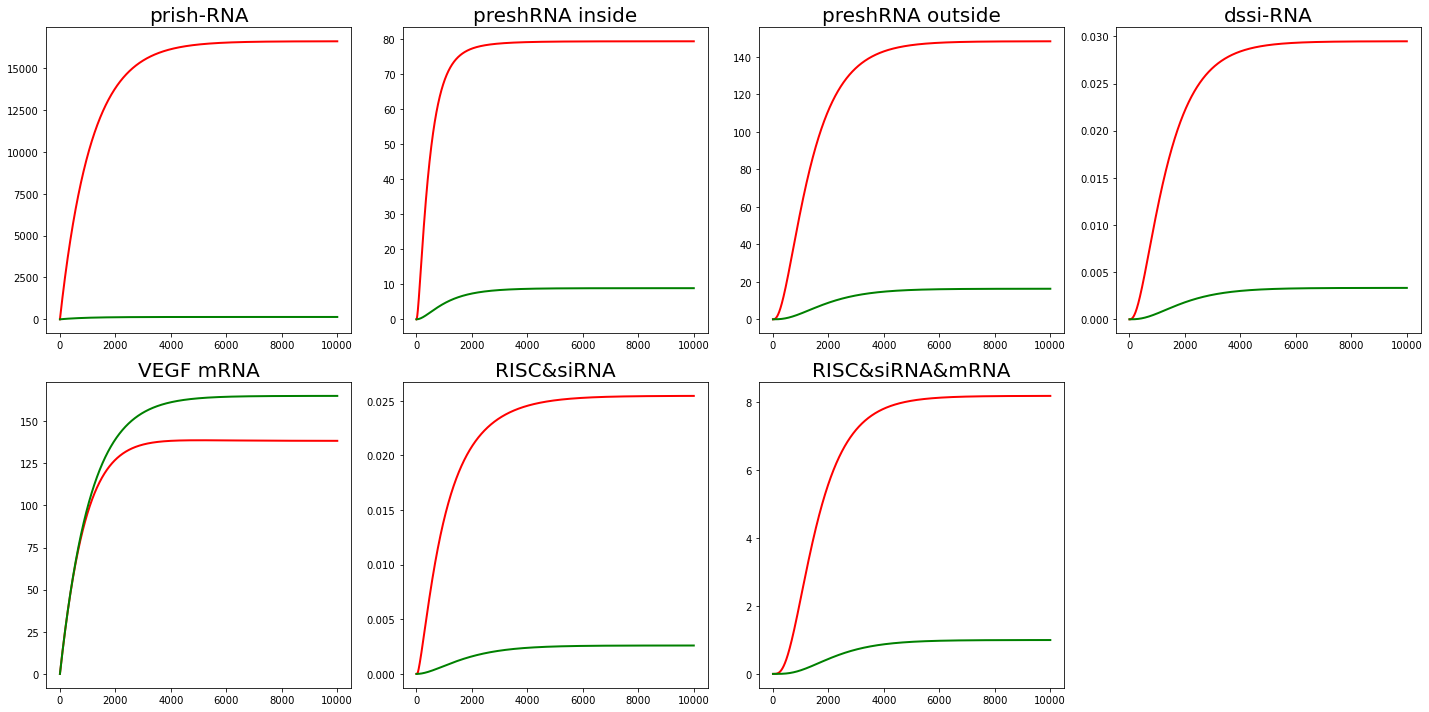

In [51]:
# s1
# sensitive analysis s1
para.update({'v_as,RISC/miRNA': 1e-2, 'v_dis,RISC/miRNA': 1e-3, 'v_as,RIM': 1e-2, 'v_dis,RIM': 1e-3})
x_can, x_ord = run(para)
draw(x_can, x_ord, name='model_RNAi_s1')

<ipython-input-48-8ade4e01c0bc>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


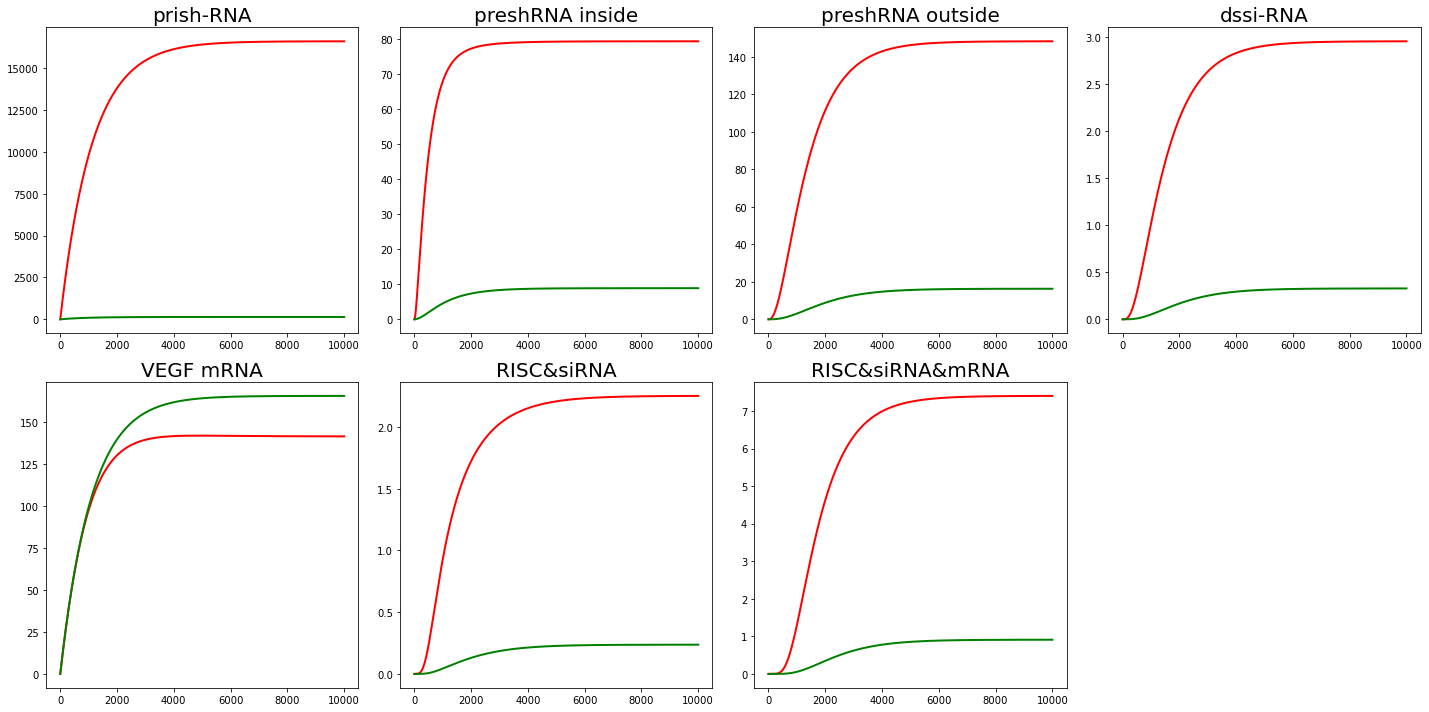

In [52]:
# s2
# sensitive analysis s2
para.update({'v_as,RISC/miRNA': 1e-4, 'v_dis,RISC/miRNA': 1e-3, 'v_as,RIM': 1e-4, 'v_dis,RIM': 1e-3})
x_can, x_ord = run(para)
draw(x_can, x_ord, name='model_RNAi_s2')

part3 特异性增殖

In [67]:
# para = {}

para.update({'gSponge': 100})  # gene copies

para.update({'alpha_Sponge': 1e-3, 'd_miRNA/sponge': 1e-3, 'd_sponge': 1e-3}) 

para.update({'v_as,miRNA/sponge': 1e-3, 'v_dis,miRNA/sponge': 1e-3, 'v_as,miRNA/E1A': 1e-3, 'v_dis,miRNA/E1A': 1e-3,})

para.update({'d_mRNA':3.3e-3, 'd_miRNA': 3.3e-3, 'd_miRNA/sponge': 5.22e-3, 'd_miRNA/E1A': 5.22e-3, 'd_sponge': 8.887e-4 })



In [68]:
def part3(x, t):
    #     prishRNA, preshRNAi, preshRNAo, dssiRNA, mVEGF, pVEGF = x # 解耦
    prishRNA, preshRNAi, preshRNAo, dssiRNA, mVEGF, Rmi, RIM, Sponge, Smi = x # 解耦
    
    RISC = 100 - Rmi - RIM
    # n = x.shape[0] # 6
    dx = np.zeros( 9 )
    # 接下来对照着latex公式和参数表输入
    # prishRNA
    dx[0] = para['alpha_prishRNA'] * para['gPri'] - (para['v_max,Drosha'] * prishRNA) / (para['k_m,Drosha'] + prishRNA) - para['d_RNA'] * prishRNA

    # preshRNA inside
    dx[1] = (para['v_max,Drosha'] * prishRNA) / (para['k_m,Drosha'] + prishRNA) - para['v_trans'] * preshRNAi - para['d_RNA'] * preshRNAi

    #preshRNA outside
    dx[2] = para['v_trans'] * preshRNAi - (para['v_max,dicer'] * preshRNAo) / (preshRNAo + para['k_m,dicer']) - para['d_RNA'] * preshRNAo

    #dssiRNA
    dx[3] = (para['v_max,dicer'] * preshRNAo) / (preshRNAo + para['k_m,dicer']) - para['d_RNA'] * dssiRNA   \
            - para['v_as,RISC/miRNA'] * RISC * dssiRNA + para['v_dis,RISC/miRNA'] * Rmi \
            - para['v_as,miRNA/sponge'] * Sponge * dssiRNA + para['v_dis,miRNA/sponge'] * Smi

    # mRNA
    dx[4] = para['gVEGF'] * para['alpha_VEGF'] - para['d_RNA'] * mVEGF - para['v_as,RIM'] * Rmi * mVEGF + para['v_dis,RIM'] * RIM 
    
    # RISC/miRNA  Rmi
    dx[5] = + para['v_as,RISC/miRNA'] * RISC * dssiRNA - para['v_dis,RISC/miRNA'] * Rmi - para['v_as,RIM'] * Rmi * mVEGF + para['v_dis,RIM'] * RIM 

    # RISC/miRNA/mRNA
    dx[6] = para['v_as,RIM'] * Rmi * mVEGF - para['v_dis,RIM'] * RIM - para['d_RIM'] * RIM

    # Sponge
    dx[7] = para['alpha_Sponge'] * para['gSponge'] - para['v_as,miRNA/sponge'] * Sponge * dssiRNA + para['v_dis,miRNA/sponge'] * Smi - para['d_sponge'] * Sponge

    # Sponge/miRNA
    dx[8] = para['v_as,miRNA/sponge'] * Sponge * dssiRNA - para['v_dis,miRNA/sponge'] * Smi - para['d_miRNA/sponge'] * Smi 

    return dx



In [86]:
# 模拟5000个单位
t = np.linspace(1,5000,2000)
ini = np.ones(9) * 1e-8  # ODE initial value

para.update({'alpha_prishRNA': 1.5e-1, 'alpha_Sponge': 1.5e-2})  #
x_1 = odeint(part3,ini,t)

para.update({'alpha_prishRNA': 1.5e-3, 'alpha_Sponge': 1.5e-2})  #
x_2 = odeint(part3,ini,t)

para.update({'alpha_prishRNA': 1.5e-3, 'alpha_Sponge': 1.5e-5})  #
x_3 = odeint(part3,ini,t)


<ipython-input-87-070c3025babe>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


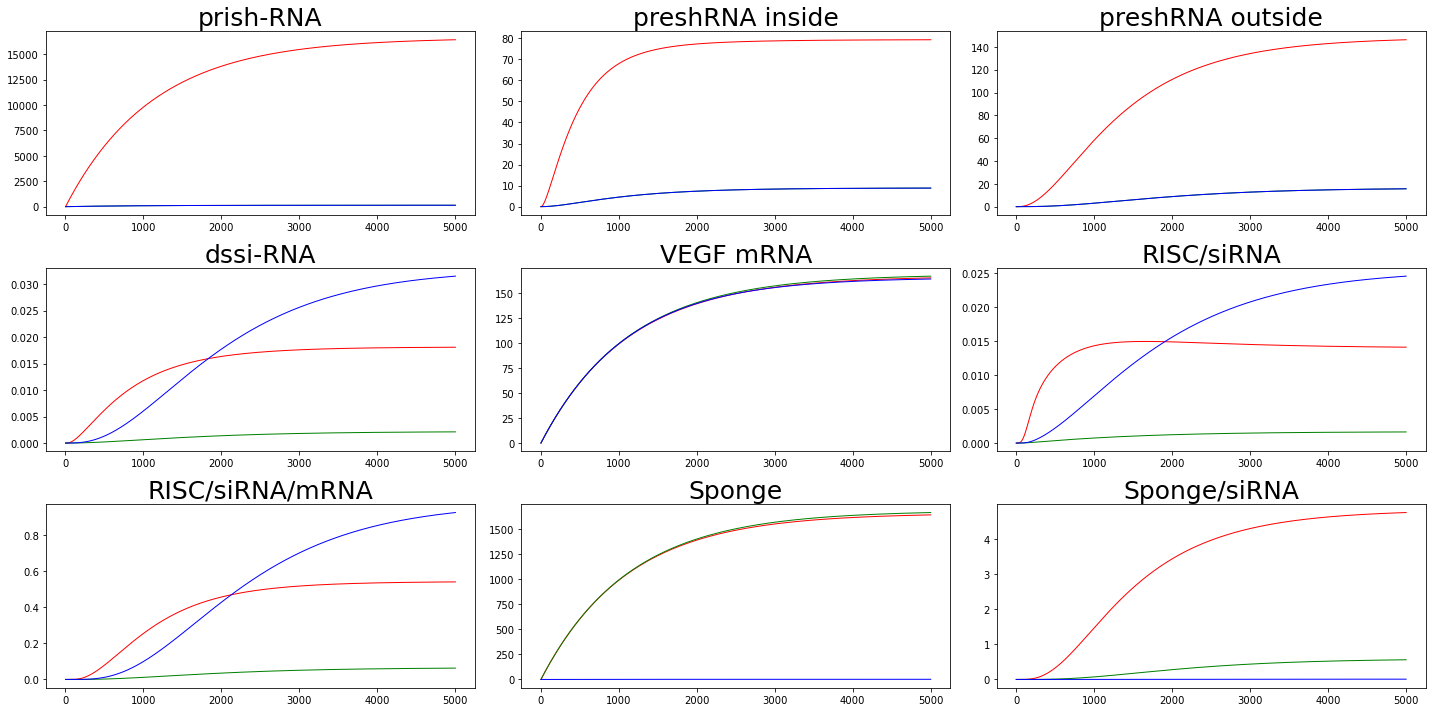

In [87]:
# 绘图
titles = ['prish-RNA', 'preshRNA inside', 'preshRNA outside', 'dssi-RNA', 'VEGF mRNA', 'RISC/siRNA', 'RISC/siRNA/mRNA', 'Sponge', 'Sponge/siRNA']  # 各个子图的title
fig = plt.figure(figsize=(20,10))
for i in range(3):
    for j in range(3):
        count = 3*i + j
        plt.subplot(3,3,count+1)
        plt.plot(t, x_1[:,count], color='red', linewidth=1)
        plt.plot(t, x_2[:,count], color='green', linewidth=1)
        plt.plot(t, x_3[:,count], color='blue', linewidth=1)
        plt.title(titles[count], fontsize=25)
# fig.suptitle(r'Results ',fontsize=16,x=0.53,y=1.05,)
# plt.title(r'Results when TGF-$\beta$ is low(red) or high(green)')
fig.tight_layout() 
fig.savefig('./model_part3.png', bbox_inches = 'tight')
fig.show()

part4 杀灭部分

In [53]:
para = {}

para.update({'gVEGF': 1, 'gTERT': 1, 'gPri': 1})  # gene copies

# prishRNA 的 alpha 估计的
para.update({'alpha_VEGF': 1.5e-3, 'alpha_TERT':1.5e-3, 'alpha_prishRNA': 1.5e-3}) # alpha: transcription rate

para.update({'beta_VEGF': 0.42, 'beta_TERT': 0.42}) # beta: translation rate

# 好几个米氏常数是估计的
para.update({'k_m,dicer': 1.2, 'v_max,dicer': 0.24, 'k_m,RNApoly2': 8.4, 'v_max,RNApoly2': 0.0071, 'v_max,VEGF': 0.0071, 'k_m,VEGF': 8.4, 'v_max,TERT': 0.0071, 'k_m,TERT': 8.41}) # M parameters

para.update({'d_mRNA,VEGF':3.3e-3, 'd_mRNA,TERT': 3.3e-3, 'd_p,VEGF': 5.22e-3, 'd_p,TERT': 5.22e-3, 'd_RNA': 8.887e-4 })

# 转运的参数是蒙的
para.update({'v_trans': 2e-2})
# 这里的参数选取了较小的值，可以防止解ode过程中divide by zero的报错


In [54]:
def part4(x, t):
    prishRNA, preshRNAi, preshRNAo, dssiRNA, mVEGF, pVEGF = x # 解耦

    # n = x.shape[0] # 6
    dx = np.zeros( 6 )
    # 接下来对照着latex公式和参数表输入
    # prishRNA
    dx[0] = para['alpha_prishRNA'] * para['gPri'] - (para['v_max,RNApoly2'] * prishRNA) / (para['k_m,RNApoly2'] + prishRNA) - para['d_RNA'] * prishRNA

    # preshRNA inside
    dx[1] = (para['v_max,RNApoly2'] * prishRNA) / (para['k_m,RNApoly2'] + prishRNA) - para['v_trans'] * preshRNAi - para['d_RNA'] * preshRNAi

    #preshRNA outside
    dx[2] = para['v_trans'] * preshRNAi - (para['v_max,dicer'] * preshRNAo) / (preshRNAo + para['k_m,dicer']) - para['d_RNA'] * preshRNAo

    #dssiRNA
    dx[3] = (para['v_max,dicer'] * preshRNAo) / (preshRNAo + para['k_m,dicer']) - para['d_RNA'] * dssiRNA   \
            - (para['v_max,VEGF'] * dssiRNA * mVEGF) / (para['k_m,VEGF'] * mVEGF + para['k_m,VEGF'] * dssiRNA + dssiRNA * mVEGF)

    # VEGF mRNA
    dx[4] = para['gVEGF'] * para['alpha_VEGF'] - (para['v_max,VEGF'] * dssiRNA * mVEGF) / (para['k_m,VEGF'] * mVEGF + para['k_m,VEGF'] * dssiRNA + dssiRNA * mVEGF) - para['d_RNA'] * mVEGF

    # VEGF protein
    dx[5] = para['beta_VEGF'] * mVEGF - para['d_p,VEGF'] * pVEGF

    return dx


In [55]:
# 模拟5000个单位
t = np.linspace(1,5000,2000)
ini = np.ones(6) * 1e-8  # ODE initial value

para.update({'alpha_prishRNA': 1.5e-5})  # 1.5e-3
x_can = odeint(part4,ini,t)

para.update({'alpha_prishRNA': 1.5e-3})  # 1.5e-3
x_ord = odeint(part4,ini,t)


<ipython-input-56-a1e4421c8f6d>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


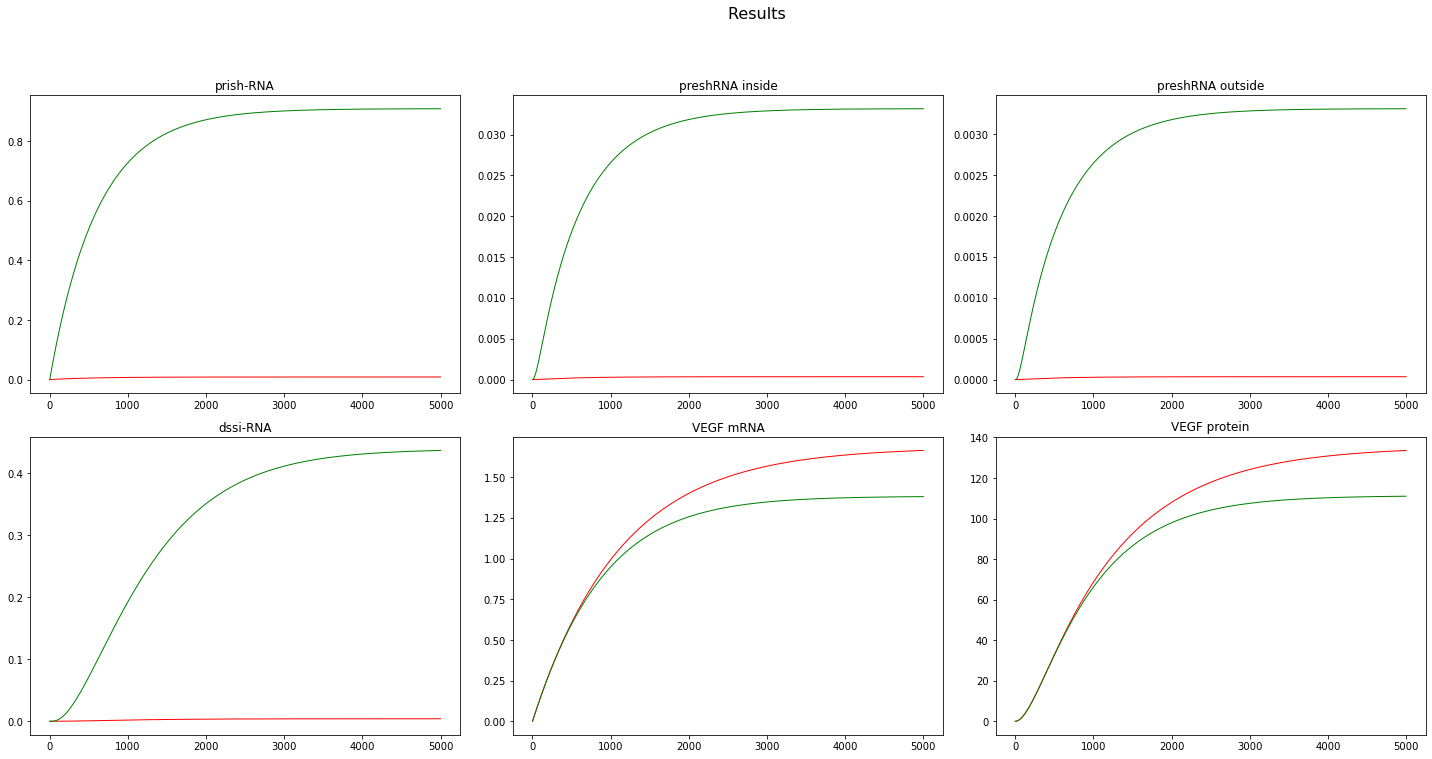

In [56]:
# 绘图
titles = ['prish-RNA', 'preshRNA inside', 'preshRNA outside', 'dssi-RNA', 'VEGF mRNA', 'VEGF protein']  # 各个子图的title
fig = plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(3):
        count = 3*i + j
        plt.subplot(2,3,count+1)
        plt.plot(t, x_can[:,count], color='red', linewidth=1)
        plt.plot(t, x_ord[:,count], color='green', linewidth=1)
        plt.title(titles[count])
fig.suptitle(r'Results ',fontsize=16,x=0.53,y=1.05,)
# plt.title(r'Results when TGF-$\beta$ is low(red) or high(green)')
fig.tight_layout() 
fig.savefig('./model_part4.png', bbox_inches = 'tight')
fig.show()

In [2]:
A = np.array([
    [2, -2, -4, 0],
    [-1, 4, 3, 5], 
    [1, 3, -2, -3],
    [0, 2, 5, 1]
])
# b = np.array([2,7,6,-4])

# x = np.dot(np.linalg.inv(A), b)
print(A)
print(np.linalg.det(A))
# print(x)

[[ 2 -2 -4  0]
 [-1  4  3  5]
 [ 1  3 -2 -3]
 [ 0  2  5  1]]
269.99999999999983


In [7]:
B = np.array([
    [-5, 5, -8],
    [3, -1, 1],
    [-3, 2, 1]
])
print(np.linalg.det(B))

-38.99999999999999


In [4]:
L = -2
A = np.array([
    [L, 1, 1, 1],
    [1, L, 1, 1],
    [1, 1, L, L],
])
B = np.array([
    [L, 1, 1, 1, 1],
    [1, L, 1, 1, L],
    [1, 1, L, L, L^2],
])

print(np.linalg.matrix_rank(A))
print(np.linalg.matrix_rank(B))

2
3
